# 빈도 데이터 EDA

    2019.01.29 날짜 선정 이유 : 2019.01.30 문재인 INDEX 언급 수 급격히 증가

    데이터 요약 : column 1 - 2019.01.29 MLBPARK에서 쓰인 토큰화된 Unique한 명사 
                column 2 - 해당 명사 언급 수

In [ ]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'http'))
	print(os.getcwd())
except:
	pass

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import zscore,norm,skew,skewnorm


In [39]:
# 2019.01.29일 상관없이 정규분포
df = pd.read_csv('M_0129_test2.csv')  # S words(over 2 characters) tokened by konlpy 


In [40]:
# zscore 칼럼 제거
df.drop(['zscore'],axis=1, inplace= True)
df.head()



,word,freq
0,혜원,9149
1,사람,7585
2,생각,4078
3,조카,3541
4,아들,3294


In [41]:
df.describe()

,freq
count,6255.000000
mean,87.635971
std,270.343448
min,3.000000
25%,9.000000
50%,20.000000
75%,67.000000
max,9149.000000


In [42]:
############################# NO LOG
no_log = np.array(df.freq)
#skewness
print(skew(no_log))  # 왜도가 0 이면 정규분포

13.88602559261476


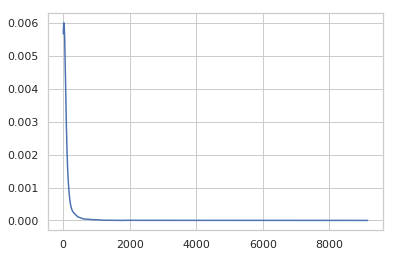

In [43]:
# 커널함수 - 밀도추정
from scipy import stats
X = no_log
estimator = stats.gaussian_kde(X, bw_method='silverman') 
K = estimator(X)
plt.plot(X, K, label='gaussian_kde') 
plt.show()

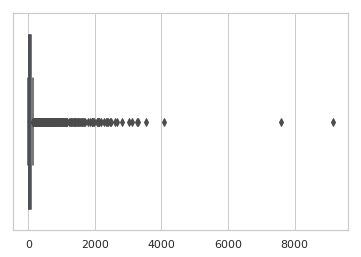

In [44]:
# boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x=no_log)

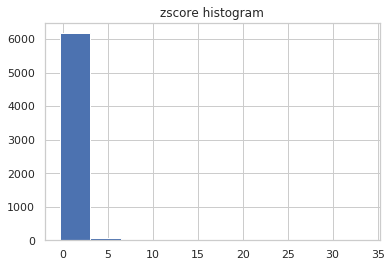

In [45]:
# 히스토그램
z_score = zscore(no_log)

plt.hist(z_score)
plt.title('zscore histogram')
plt.show()

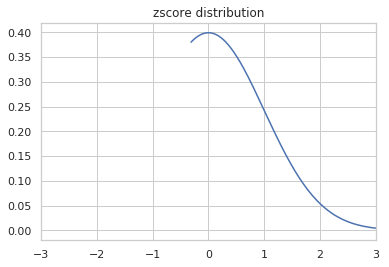

In [46]:
plt.plot(z_score, norm.pdf(z_score))
plt.xlim(-3,3)
plt.title('zscore distribution')
plt.show()

In [47]:
########################### AFTER LOG
after_log = np.array(np.log10(df.freq))

#skewness
print(skew(after_log))  # 로그를 취한 후 왜도가 줄어듦


0.656231923754106


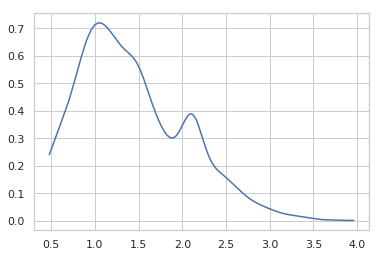

In [48]:
# 커널함수 - 밀도추정
X = after_log

estimator = stats.gaussian_kde(X, bw_method='silverman') 
K = estimator(X)
plt.plot(X, K, label='gaussian_kde') 
plt.show()
 

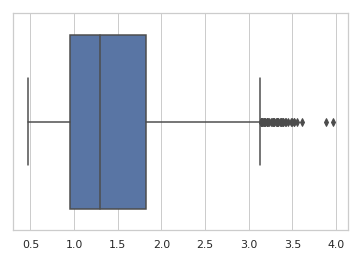

In [49]:
# boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x=after_log)


In [50]:
for_zscore = list(after_log.flatten())
print(list(after_log.flatten())[:5])
print(type(for_zscore))


[3.961373627594801, 3.879955585122749, 3.6104472214421213, 3.5491259267581112, 3.5177235948337353]
<class 'list'>


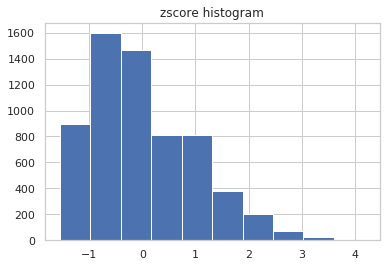

In [51]:
# 히스토그램
z_score = zscore(for_zscore)
 
plt.hist(z_score)
plt.title('zscore histogram')
plt.show()


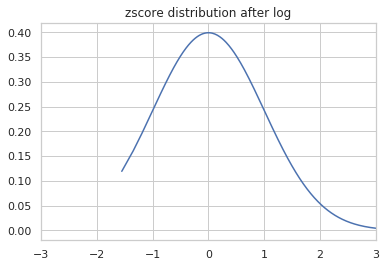

In [52]:
plt.plot(z_score, norm.pdf(z_score))
plt.xlim(-3,3)
plt.title('zscore distribution after log')
plt.show()
